In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [12]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

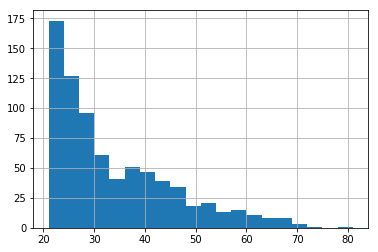

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep,
             insulin, bmi, diabetes_pedigree,assigned_group, age_bucket]

In [17]:
# Train test split

In [18]:
x_data = diabetes.drop('Class', axis=1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [23]:
# Labels
labels = diabetes['Class']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels,test_size=0.3, random_state=101)

In [25]:
# input functions

In [26]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)

In [27]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_model_dir': '/var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp6bqfr24v', '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [28]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp6bqfr24v/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 379.701
INFO:tensorflow:step = 101, loss = 5.64543 (0.265 sec)
INFO:tensorflow:global_step/sec: 434.48
INFO:tensorflow:step = 201, loss = 5.82416 (0.230 sec)
INFO:tensorflow:global_step/sec: 432.955
INFO:tensorflow:step = 301, loss = 5.6602 (0.231 sec)
INFO:tensorflow:global_step/sec: 418.787
INFO:tensorflow:step = 401, loss = 5.54791 (0.239 sec)
INFO:tensorflow:global_step/sec: 430.1
INFO:tensorflow:step = 501, loss = 4.60886 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.954
INFO:tensorflow:step = 601, loss = 3.64504 (0.235 sec)
INFO:tensorflow:global_step/sec: 429.175
INFO:tensorflow:step = 701, loss = 6.68745 (0.232 sec)
INFO:tensorflow:global_step/sec: 410.058
INFO:tensorflow:step = 801, loss = 6.64003 (0.244 sec)
INFO:tensorflow:global_step/sec:

In [29]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                 batch_size=10,
                                                 num_epochs=1,
                                                 shuffle=False) 

In [30]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-01-16-20:52:52
INFO:tensorflow:Restoring parameters from /var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp6bqfr24v/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-01-16-20:52:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.799218, auc_precision_recall = 0.637536, average_loss = 0.525362, global_step = 1000, label/mean = 0.350649, loss = 5.05661, prediction/mean = 0.368035


In [31]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79921806,
 'auc_precision_recall': 0.63753599,
 'average_loss': 0.5253616,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0566058,
 'prediction/mean': 0.36803532}

In [32]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [33]:
predictions = model.predict(pred_input_func)

In [34]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp6bqfr24v/model.ckpt-1000


In [35]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.56364721], dtype=float32),
  'logits': array([ 0.25597763], dtype=float32),
  'probabilities': array([ 0.43635273,  0.56364721], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.62855345], dtype=float32),
  'logits': array([ 0.52601624], dtype=float32),
  'probabilities': array([ 0.37144652,  0.62855345], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.3780109], dtype=float32),
  'logits': array([-0.49799955], dtype=float32),
  'probabilities': array([ 0.62198913,  0.37801093], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34257621], dtype=float32),
  'logits': array([-0.65183473], dtype=float32),
  'probabilities': array([ 0.65742379,  0.34257621], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                       feature_columns=feat_cols,
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_model_dir': '/var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp4bha2d9x', '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [37]:
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [38]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [39]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep,
             insulin, bmi, diabetes_pedigree,embedded_group_col, age_bucket]

In [40]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                       feature_columns=feat_cols,
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_model_dir': '/var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp3txd512c', '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [42]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp3txd512c/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.60329
INFO:tensorflow:global_step/sec: 383.447
INFO:tensorflow:step = 101, loss = 7.51034 (0.262 sec)
INFO:tensorflow:global_step/sec: 430.522
INFO:tensorflow:step = 201, loss = 5.41583 (0.232 sec)
INFO:tensorflow:global_step/sec: 452.876
INFO:tensorflow:step = 301, loss = 4.755 (0.222 sec)
INFO:tensorflow:global_step/sec: 462.422
INFO:tensorflow:step = 401, loss = 5.1601 (0.216 sec)
INFO:tensorflow:global_step/sec: 427.853
INFO:tensorflow:step = 501, loss = 4.02276 (0.239 sec)
INFO:tensorflow:global_step/sec: 474.498
INFO:tensorflow:step = 601, loss = 3.6814 (0.205 sec)
INFO:tensorflow:global_step/sec: 444.575
INFO:tensorflow:step = 701, loss = 4.38931 (0.226 sec)
INFO:tensorflow:global_step/sec: 471.391
INFO:tensorflow:step = 801, loss = 2.46618 (0.211 sec)
INFO:tensorflow:global_step/sec:

In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                      batch_size=10, num_epochs=1,
                                                     shuffle=False)

In [46]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-01-16-21:03:59
INFO:tensorflow:Restoring parameters from /var/folders/d2/0mftypjn6lj4_6tsb6y_1y_r0000gn/T/tmp3txd512c/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-01-16-21:04:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.770563, accuracy_baseline = 0.649351, auc = 0.828272, auc_precision_recall = 0.681946, average_loss = 0.486981, global_step = 1000, label/mean = 0.350649, loss = 4.68719, prediction/mean = 0.355263


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82827163,
 'auc_precision_recall': 0.6819461,
 'average_loss': 0.48698118,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6871939,
 'prediction/mean': 0.35526341}